In [1]:
!pip install web3

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.5/515.5 kB 7.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 580.1/580.1 kB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.5/100.5 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.3/157.3 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.3/288.3 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.9/168.9 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 38.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 46.3 MB/s eta 0:00:00
  Created wheel for pyunormalize: filename=pyunormalize-15.1.0-py3-none-any.whl size=516031 sha256=7138b5d1c208781d64122ebbf891b5ccb142fb58d43d2ffbd6c7b32a3b487ad0
  

In [4]:
from web3 import Web3
import matplotlib.pyplot as plt

# Set up the Web3 provider
w3 = Web3(Web3.HTTPProvider('https://mainnet.infura.io/v3/326a5b5a76574158ab88f53c56e5105c'))
beacon_deposit_contract_address = '0x00000000219ab540356cBB839Cbe05303d7705Fa'
beacon_deposit_contract_abi = [{"inputs":[{"internalType":"address","name":"_logic","type":"address"},{"internalType":"address","name":"admin_","type":"address"},{"internalType":"bytes","name":"_data","type":"bytes"}],"stateMutability":"payable","type":"constructor"},{"anonymous":False,"inputs":[{"indexed":False,"internalType":"address","name":"previousAdmin","type":"address"},{"indexed":False,"internalType":"address","name":"newAdmin","type":"address"}],"name":"AdminChanged","type":"event"},{"anonymous":False,"inputs":[{"indexed":True,"internalType":"address","name":"beacon","type":"address"}],"name":"BeaconUpgraded","type":"event"},{"anonymous":False,"inputs":[{"indexed":True,"internalType":"address","name":"implementation","type":"address"}],"name":"Upgraded","type":"event"},{"stateMutability":"payable","type":"fallback"},{"inputs":[],"name":"admin","outputs":[{"internalType":"address","name":"admin_","type":"address"}],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"newAdmin","type":"address"}],"name":"changeAdmin","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[],"name":"implementation","outputs":[{"internalType":"address","name":"implementation_","type":"address"}],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"newImplementation","type":"address"}],"name":"upgradeTo","outputs":[],"stateMutability":"nonpayable","type":"function"},{"inputs":[{"internalType":"address","name":"newImplementation","type":"address"},{"internalType":"bytes","name":"data","type":"bytes"}],"name":"upgradeToAndCall","outputs":[],"stateMutability":"payable","type":"function"},{"stateMutability":"payable","type":"receive"}]
# Create a contract instance

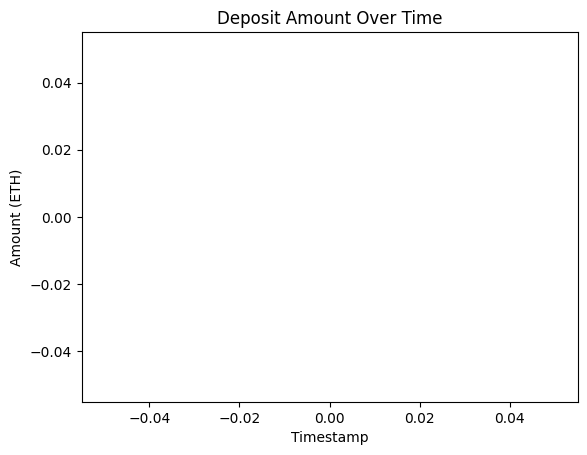

In [6]:

contract = w3.eth.contract(address=beacon_deposit_contract_address, abi=beacon_deposit_contract_abi)

# List to store deposit data
deposit_data = []

# Get the latest deposit data
def get_deposit_data():
    # Get the latest block number
    block_number = w3.eth.get_block_number()

    # Get the block
    block = w3.eth.get_block(block_number)

    # Get the transactions in the block
    transactions = [w3.eth.get_transaction(tx_hash) for tx_hash in block.transactions]

    # Filter the transactions to get the deposits
    deposits = [tx for tx in transactions if tx.to == beacon_deposit_contract_address]



    # Store the deposit data in the list
    for deposit in deposits:
        amount = w3.from_wei(deposit.value, "ether")
        sender = getattr(deposit, "from")
        timestamp = block.timestamp
        deposit_data.append({'amount': amount, 'sender': sender, 'timestamp': timestamp})

    return deposits


    # Create the chart here
def visualize_deposits(deposit_data):
    # Create a chart to display deposit data
    plt.plot([d['timestamp'] for d in deposit_data], [d['amount'] for d in deposit_data])
    plt.xlabel('Timestamp')
    plt.ylabel('Amount (ETH)')
    plt.title('Deposit Amount Over Time')
    plt.show()

def main():
    # Add code to retrieve deposit data
    deposit_data = get_deposit_data()

    # Add code to create a chart from the deposit data
    visualize_deposits(deposit_data)

if __name__ == '__main__':
    main()



